In [1]:
library(data.table)
library(ggplot2)
library(latex2exp)


In [2]:
time <- as.integer(50)

In [500]:
N_AGENTS <- 1134

In [3]:
N_AGENTS <- 12625

In [56]:
mypath <- "../../log/server/contact-active/lazy/Emailcontacts-contact-active-alpha0.5"

In [57]:
#mypath <- "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5"

In [58]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [59]:
list.dirs(mypath)

[1] "2019_12_03_18_17_24" "2019_12_03_18_22_56" "2019_12_03_18_28_25"
  [4] "2019_12_03_18_33_55" "2019_12_03_18_39_27" "2019_12_03_18_44_54"
  [7] "2019_12_03_18_50_25" "2019_12_03_18_55_56" "2019_12_03_19_01_33"
 [10] "2019_12_03_19_07_22" "2019_12_03_19_12_48" "2019_12_03_19_18_07"
 [13] "2019_12_03_19_23_45" "2019_12_03_19_29_13" "2019_12_03_19_34_39"
 [16] "2019_12_03_19_40_09" "2019_12_03_19_45_37" "2019_12_03_19_51_24"
 [19] "2019_12_03_19_56_48" "2019_12_03_20_02_23" "2019_12_03_20_07_52"
 [22] "2019_12_03_20_13_17" "2019_12_03_20_18_50" "2019_12_03_20_24_20"
 [25] "2019_12_03_20_29_51" "2019_12_03_20_35_23" "2019_12_03_20_40_47"
 [28] "2019_12_03_20_46_15" "2019_12_03_20_51_44" "2019_12_03_20_57_15"
 [31] "2019_12_03_21_02_43" "2019_12_03_21_08_02" "2019_12_03_21_13_33"
 [34] "2019_12_03_21_19_03" "2019_12_03_21_24_28" "2019_12_03_21_29_59"
 [37] "2019_12_03_21_35_34" "2019_12_03_21_41_00" "2019_12_03_21_46_29"
 [40] "2019_12_03_21_52_01" "2019_12_03_21_57_25" "2019_12_03_22_02_52"
 [43] "2019_12_03_22_08_29" "2019_12_03_22_13_47" "2019_12_03_22_19_19"
 [46] "2019_12_03_22_24_46" "2019_12_03_22_30_14" "2019_12_03_22_35_43"
 [49] "2019_12_03_22_41_05" "2019_12_03_22_46_29" "2019_12_03_22_51_55"
 [52] "2019_12_03_22_57_24" "2019_12_03_23_02_53" "2019_12_03_23_08_31"
 [55] "2019_12_03_23_14_03" "2019_12_03_23_19_30" "2019_12_03_23_24_51"
 [58] "2019_12_03_23_30_12" "2019_12_03_23_35_47" "2019_12_03_23_41_10"
 [61] "2019_12_03_23_46_39" "2019_12_03_23_52_06" "2019_12_03_23_57_38"
 [64] "2019_13_03_00_03_05" "2019_13_03_00_08_35" "2019_13_03_00_14_09"
 [67] "2019_13_03_00_19_30" "2019_13_03_00_24_49" "2019_13_03_00_30_26"
 [70] "2019_13_03_00_35_59" "2019_13_03_00_41_32" "2019_13_03_00_47_10"
 [73] "2019_13_03_00_52_44" "2019_13_03_00_58_24" "2019_13_03_01_04_52"
 [76] "2019_13_03_01_10_20" "2019_13_03_01_15_57" "2019_13_03_01_21_20"
 [79] "2019_13_03_01_26_39" "2019_13_03_01_32_15" "2019_13_03_01_37_45"
 [82] "2019_13_03_01_43_11" "2019_13_03_01_48_41" "2019_13_03_01_54_06"
 [85] "2019_13_03_01_59_34" "2019_13_03_02_05_00" "2019_13_03_02_10_33"
 [88] "2019_13_03_02_15_56" "2019_13_03_02_21_21" "2019_13_03_02_27_01"
 [91] "2019_13_03_02_32_27" "2019_13_03_02_37_59" "2019_13_03_02_43_34"
 [94] "2019_13_03_02_49_11" "2019_13_03_02_54_46" "2019_13_03_03_00_14"
 [97] "2019_13_03_03_05_38" "2019_13_03_03_11_08" "2019_13_03_03_16_38"
[100] "2019_13_03_03_22_05" "2019_13_03_03_27_35" "2019_13_03_03_33_05"
[103] "2019_13_03_03_38_27" "2019_13_03_03_43_40" "2019_13_03_03_49_12"
[106] "2019_13_03_03_54_38" "2019_13_03_03_59_59" "2019_13_03_04_05_23"
[109] "2019_13_03_04_10_52" "2019_13_03_04_16_22" "2019_13_03_04_21_46"
[112] "2019_13_03_04_27_09" "2019_13_03_04_32_46" "2019_13_03_04_38_17"
[115] "2019_13_03_04_43_44" "2019_13_03_04_49_18" "2019_13_03_04_54_37"
[118] "2019_13_03_05_00_03" "2019_13_03_05_05_27" "2019_13_03_05_10_54"
[121] "2019_13_03_05_16_17" "2019_13_03_05_21_47" "2019_13_03_05_27_28"
[124] "2019_13_03_05_32_54" "2019_13_03_05_38_29" "2019_13_03_05_43_58"
[127] "2019_13_03_05_49_24" "2019_13_03_05_54_53" "2019_13_03_06_00_21"
[130] "2019_13_03_06_05_48" "2019_13_03_06_11_21" "2019_13_03_06_16_48"
[133] "2019_13_03_06_22_18" "2019_13_03_06_27_51" "2019_13_03_06_33_24"
[136] "2019_13_03_06_38_51" "2019_13_03_06_44_22" "2019_13_03_06_49_50"
[139] "2019_13_03_06_55_18" "2019_13_03_07_00_41" "2019_13_03_07_06_31"
[142] "2019_13_03_07_12_01" "2019_13_03_07_17_27" "2019_13_03_07_24_26"
[145] "2019_13_03_07_29_58" "2019_13_03_07_35_31" "2019_13_03_07_41_01"
[148] "2019_13_03_07_46_27" "2019_13_03_07_51_55" "2019_13_03_07_57_23"
[151] "2019_13_03_08_02_50" "2019_13_03_08_08_22" "2019_13_03_08_13_51"
[154] "2019_13_03_08_19_22" "2019_13_03_08_24_54" "2019_13_03_08_30_19"
[157] "2019_13_03_08_35_51" "2019_13_03_08_41_10" "2019_13_03_08_46_50"
[160] "2019_13_03_08_52_19" "2019_13_03_08_57_41" "2019_13_03_09_03_11"
[163] "2019_13_03_09_08_48" "2019_13_03_09_14_08" "2019_13_03_09_19_36"
[166] "2019_13_03_09_25_03" "2019_13_03_09

In [60]:
thepath = list.dirs(mypath)[1]

In [61]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")

In [62]:
DF <- read.csv(file = filename, skip=12)

In [63]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [64]:
tempDF

,time,agent,k.core,state,degree
9074,1,9073,1,i,1


In [65]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [66]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [67]:
DT <- data.table(DF)

In [68]:
DT1 = DT[, sum(density), by=list(time, state)]

In [69]:
names(DT1)[names(DT1)=="V1"] <- "density"

In [70]:
DT1$density <- DT1$density / N_AGENTS

In [71]:
DT1$'agent.init' <- agent
DT1$'k.core.init' <- kcore

In [72]:
tempDT1 <- DT1[DT1$state == 'r']
tempDT1 <- tempDT1[tempDT1$time == 120]
density <- as.numeric(tempDT1[,'density'])

In [73]:
DT1 = DT1[DT1$state == 'r']
DT1[,state:=NULL]

## All datasets

Assemble everything and do the loops

In [74]:
emptytable <- data.table()
lista = list.dirs(mypath)
for (i in lista){    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    #print(filename)
    DF <- read.csv(file = filename, skip=12)
    tempDF <- DF[DF$state =='i',]
    tempDF <- tempDF[tempDF$time == 1,]

    agent <- as.integer(tempDF['agent'])
    kcore <- as.integer(tempDF['k.core'])

    DF$'agent.init' <- agent
    DF$'k.core.init' <- kcore
    DF$'density' <- 1
    DF$'density.mean' <- 1
    DF$'density.std' <- 1

    DT <- data.table(DF)
    DT1 = DT[, sum(density), by=list(time, state)]
    
    names(DT1)[names(DT1)=="V1"] <- "density"

    DT1$density <- DT1$density / N_AGENTS

    DT1$'agent.init' <- agent
    DT1$'k.core.init' <- kcore
    
    tempDT1 <- DT1[DT1$state == 'r']
    tempDT1 <- tempDT1[tempDT1$time == 120]
    density <- as.numeric(tempDT1[,'density'])
    
    DT1 = DT1[DT1$state == 'r']
    DT1[,state:=NULL]
    #print(DT1)
    emptytable <- rbind(emptytable, DT1)
}

In [75]:
rawtable <- emptytable

Compute mean and standard deviation and add to data table

In [90]:
emptytable <- rawtable

In [91]:
emptytabletime <- emptytable[emptytable$time == 120]
#emptytabletime$density <- emptytabletime$density + 1e-3
#emptytabletime <- emptytabletime[emptytabletime$density < 0.02]
emptytabletime <- emptytabletime[emptytabletime$density > 0.01]
#emptytabletime <- emptytabletime[emptytabletime$k.core.init > 1]
#emptytabletime$k.core.init <- emptytabletime$k.core.init + emptytabletime$k.core.init %% 2
toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
toplot$mean <- emptytabletime[emptytabletime$time == 120][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 120][, sd(density), by=list(time, k.core.init)][,'V1']

Clean NaN values

In [92]:
toplot[is.na(toplot)] <- 1e-4

In [93]:
toplot = toplot[order(toplot$k.core.init),]

In [94]:
typeof(toplot)

[1] "list"

In [95]:
save(emptytabletime,file=paste(mypath, "/", "eptytabletime.Rda", sep=""))
save(toplot,file=paste(mypath, "/", "toplot.Rda", sep=""))

In [96]:
load(paste(mypath, "/", "toplot.Rda", sep=""))

In [97]:
toplot

k.core.init,mean,std
1,0.0962227722772,0.00717088211062
2,0.0954887488749,0.00610161665474
3,0.1001944194419,0.00657434727921
4,0.0961425742574,0.00622059463602
5,0.0978415841584,0.00807245628239
6,0.0967619047619,0.00536568487894
7,0.0966376237624,0.00717683830700
8,0.0968277227723,0.00707381910436
9,0.0991433038041,0.00675845978172
10,0.0976514851485,0.00653480000467


Plot

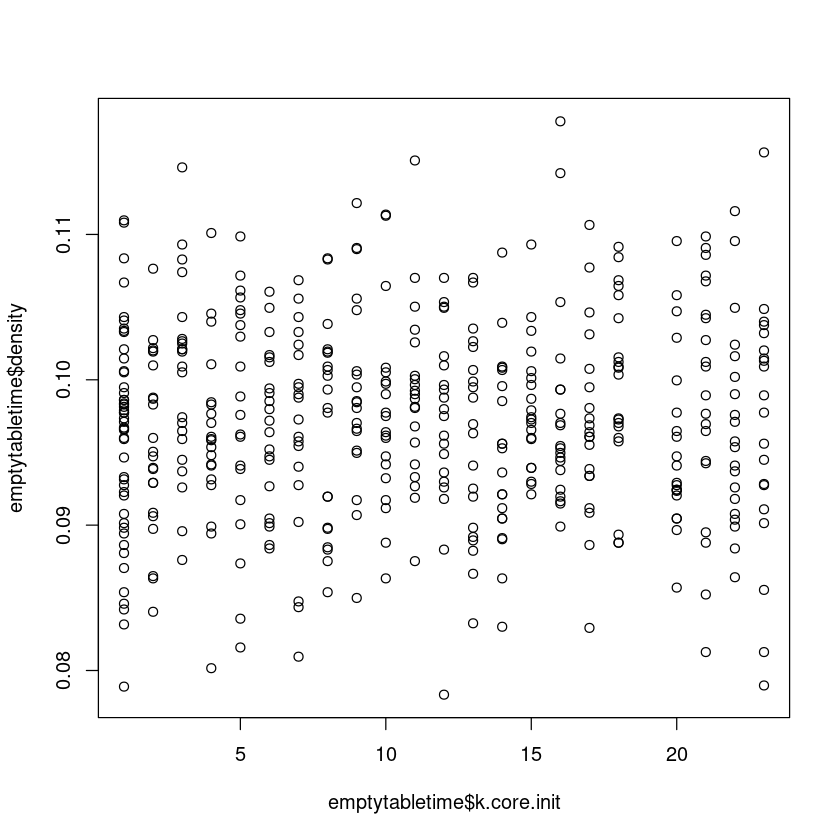

In [98]:
plot(emptytabletime$k.core.init, emptytabletime$density)

In [99]:
f <- function(x,a,b) {a * exp(b * x)} 



Call:
lm(formula = y ~ x)

Residuals:
            Min              1Q          Median              3Q             Max 
-0.002448140452 -0.000894063448 -0.000439136405  0.000743019134  0.003000261170 

Coefficients:
                  Estimate     Std. Error   t value Pr(>|t|)
(Intercept) 9.71643143e-02 6.25825458e-04 155.25785  < 2e-16
x           9.94797496e-06 4.66286165e-05   0.21334  0.83322

Residual standard error: 0.00144531618 on 20 degrees of freedom
Multiple R-squared:  0.00227063363,	Adjusted R-squared:  -0.0476158347 
F-statistic: 0.0455160228 on 1 and 20 DF,  p-value: 0.833217744


[1] 0.0476511660728


Call:
lm(formula = y ~ poly(x, 2))

Residuals:
            Min              1Q          Median              3Q             Max 
-0.002612826497 -0.000664401737 -0.000413677592  0.000645559116  0.003153378099 

Coefficients:
                   Estimate      Std. Error   t value Pr(>|t|)
(Intercept)  0.097280524782  0.000313832852 309.97559  < 2e-16
poly(x, 2)1  0.000308350755  0.001472006554   0.20948  0.83631
poly(x, 2)2 -0.000780714031  0.001472006554  -0.53037  0.60200

Residual standard error: 0.00147200655 on 19 degrees of freedom
Multiple R-squared:  0.0168265986,	Adjusted R-squared:  -0.0866653384 
F-statistic: 0.162588498 on 2 and 19 DF,  p-value: 0.851110889


[1] 0.12971737961

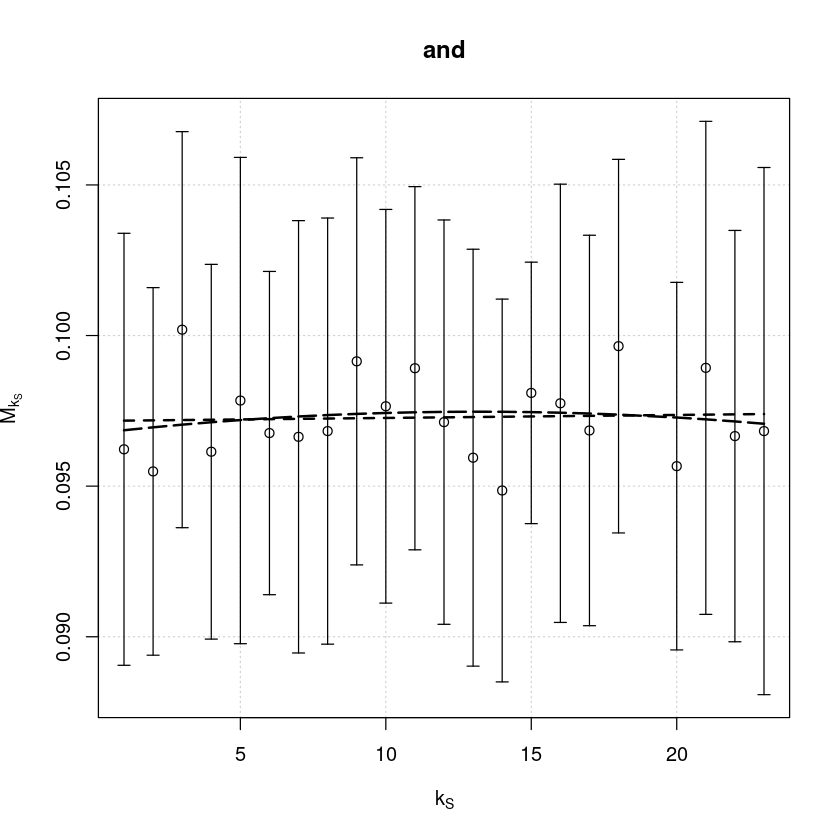

In [100]:
x <- toplot$k.core.init
y <- toplot$mean
dy <- toplot$std
plot(x, y, main="and",
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
     panel.first=grid()
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


#nonlin_mod=nls(y~a*exp(b*x),start=list(a=1,b=0.1)) #a is the starting value and b is the exponential start
#lines(x,predict(nonlin_mod),col="red")
#summary(nonlin_mod)

# constant
m<-lm(y~x)
summary(m)
cor(y,predict(m))
lines(x,predict(m),lty=2,col="black",lwd=2)

# polynomial
m<-lm(y ~ poly(x,2))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=5,col="black",lwd=2)



Formula: y ~ a * x/(b + x)

Parameters:
        Estimate     Std. Error   t value Pr(>|t|)
a 0.097476179160 0.000388974509 250.59786  < 2e-16
b 0.012056698595 0.015036494774   0.80183  0.43208

Residual standard error: 0.00142375841 on 20 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 8.54602241e-07


[1] 0.178359809068


Formula: y ~ 1 - exp(-(1 + b) * x)

Parameters:
         Estimate      Std. Error    t value   Pr(>|t|)
b -0.993215410403  0.000856258641 -1159.9479 < 2.22e-16

Residual standard error: 0.0479217947 on 21 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 2.4368861e-06


[1] 0.0501434502301

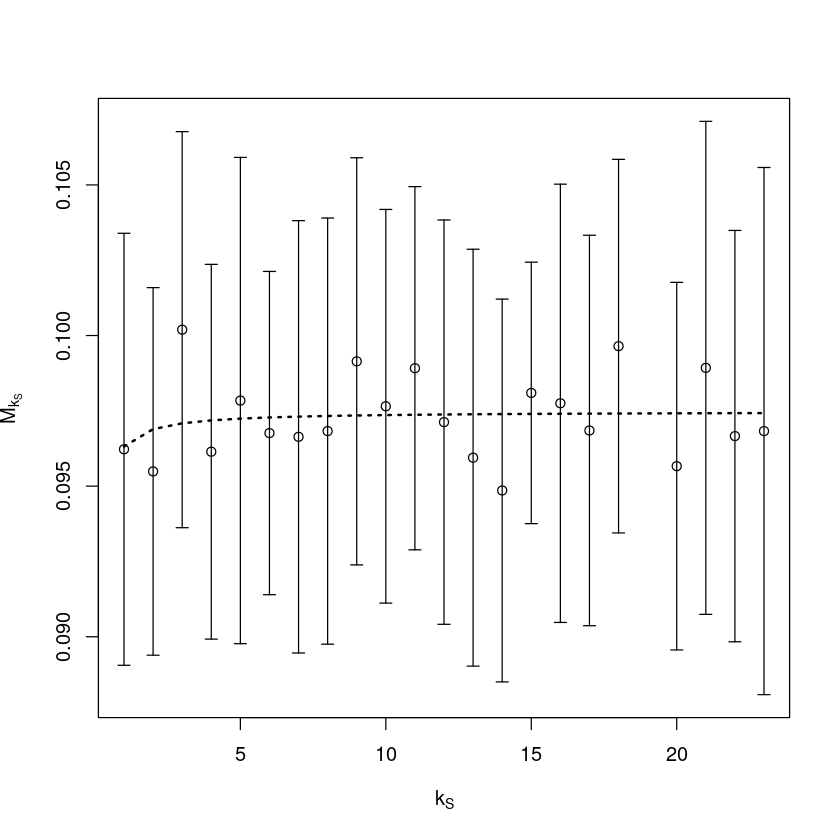

In [101]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)

# hyperbolic
m<-nls(y~a*x/(b+x), start=c(a=1,b=1))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=3,col="black",lwd=2)

# exponential
m<-nls(y~1 - exp(-(1+b)*x), start=list(b=0.1))
summary(m)
cor(y,predict(m))
#plot
#lines(x,predict(m),lty=4,col="black",lwd=2)

In [102]:
pdf('mksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
    ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()


png 
  2

Log y plot

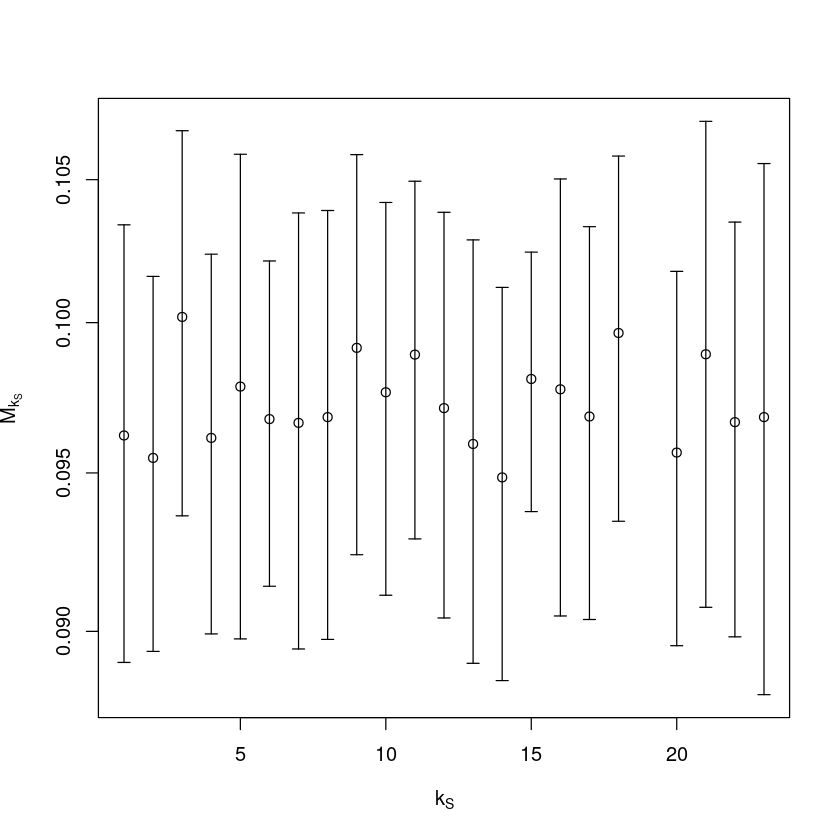

In [103]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


In [104]:
pdf('logmksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
     ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()

png 
  2